# **Actividad 1.2 Extracción de Características**

## Carga de Archivo, Sustitución de Valores Nulos y Atípicos

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

Dataframe=pd.read_csv("DataAnalytics.csv")
Dataframe.isnull().sum()

Administrador              0
Usuario                    0
botón correcto           762
tiempo de interacción    762
mini juego               156
número de interacción    762
color presionado         762
dificultad                 0
fecha                      0
Juego                      0
auto push                762
tiempo de lección        177
tiempo de sesión         606
dtype: int64

In [2]:


cuantitativas_con_nulos = Dataframe.select_dtypes(include=['float64', 'int64','float','int'])
#Separo columnas cualitativas del dataframe
cualitativas_con_nulos = Dataframe.select_dtypes(include=['object', 'datetime','category'])
#Sustituir valores nulos con promedio o media
cualitativas = cualitativas_con_nulos.fillna("Sin registro")

#cuantitativas = cuantitativas_con_nulos.fillna(-1)
Dataframe=pd.concat([cuantitativas_con_nulos, cualitativas], axis=1)

In [3]:
Dataframe.isnull().sum()

botón correcto           762
tiempo de interacción    762
número de interacción    762
auto push                762
tiempo de lección        177
tiempo de sesión         606
Administrador              0
Usuario                    0
mini juego                 0
color presionado           0
dificultad                 0
fecha                      0
Juego                      0
dtype: int64

La sustitución de valores atípicos no es necesaria ya que se considera que por la naturaleza de los datos, todos los registros son significativas

## Análisis Univariado (Gráficas)

         frequency
Juego             
Astro         3799
Cadetes       2066


Text(0, 0.5, 'Frecuencia')

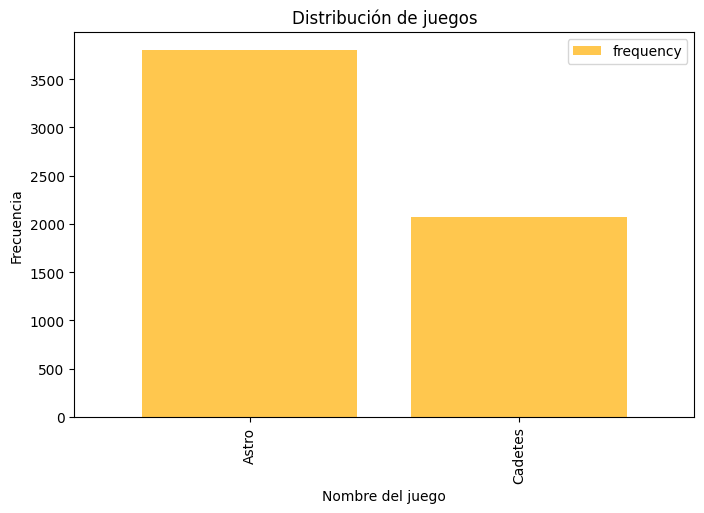

In [4]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Dataframe['Juego'])

#Elimino las columnas "percentage" y "cumulative_perc" para trabajar con las frecuencias
table2= table1.drop(['percentage','cumulative_perc'], axis=1)

#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table2[table2['frequency']>1]

#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('Juego')
print(Filtro_index)

#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(8,5), color= "#ffc74e")
plt.title('Distribución de juegos')
plt.xlabel('Nombre del juego')
plt.ylabel('Frecuencia')


Se puede notar en la gráfica que la mayoría de las interacciones registradas pertenecen al juego "Astro".

            frequency
dificultad           
Episodio 1       2357
Episodio 2       1493
Episodio 3       1292
Episodio 4        723


Text(0, 0.5, 'Frecuencia')

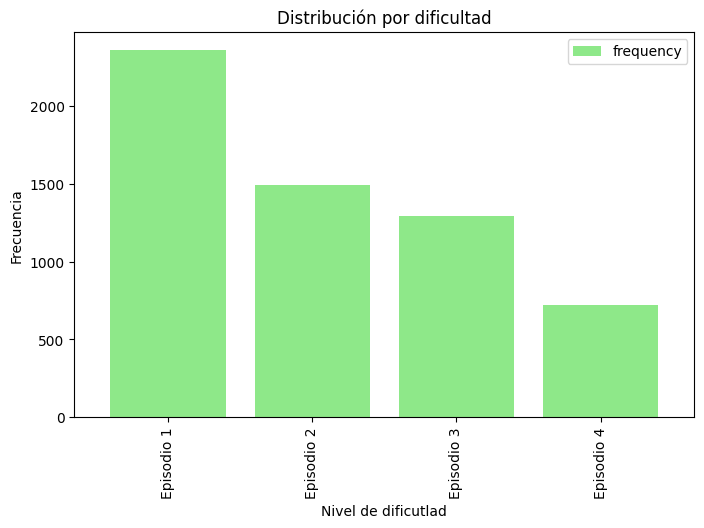

In [5]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Dataframe['dificultad'])

#Elimino las columnas "percentage" y "cumulative_perc" para trabajar con las frecuencias
table2= table1.drop(['percentage','cumulative_perc'], axis=1)

#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table2[table2['frequency']>1]

#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('dificultad')
print(Filtro_index)

#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(8,5), color= "#8ee889")
plt.title('Distribución por dificultad')
plt.xlabel('Nivel de dificutlad')
plt.ylabel('Frecuencia')

 El Episodio 1 es el más frecuente, seguido del Episodio 2. Los episodios más avanzados (3 y 4) tienen menos registros. Lo que indica que los usuarios pasan más tiempo en los niveles iniciales.

                    frequency
mini juego                   
Asteroides               1054
Restaurante               869
Estrellas                 813
Gusanos                   748
sonidos y animales        743
animales y colores        545
figuras y colores         400
partes del cuerpo         320
Despegue                  196
Sin registro              156
MiniGame_0                  8
MiniGame_3                  5
MiniGame_2                  5
MiniGame_1                  3


Text(0, 0.5, 'Frecuencia')

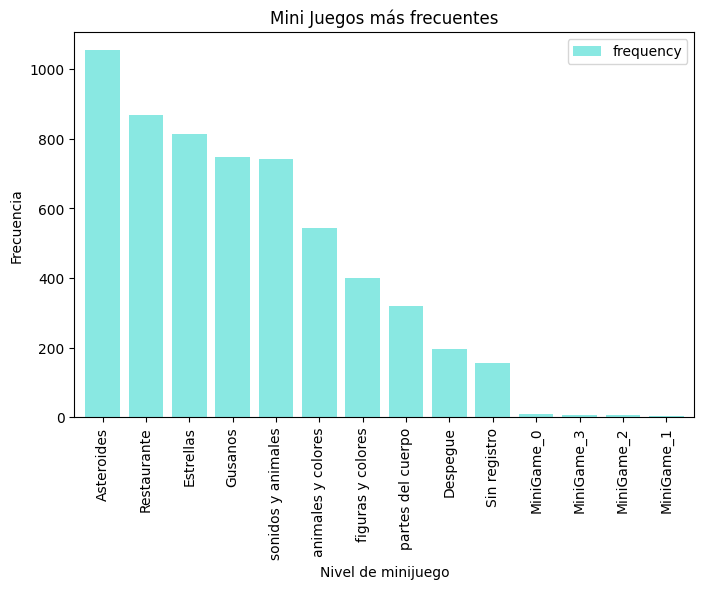

In [6]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Dataframe['mini juego'])

#Elimino las columnas "percentage" y "cumulative_perc" para trabajar con las frecuencias
table2= table1.drop(['percentage','cumulative_perc'], axis=1)

#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table2[table2['frequency']>1]

#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('mini juego')
print(Filtro_index)

#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(8,5), color= "#89e8e2")
plt.title('Mini Juegos más frecuentes')
plt.xlabel('Nivel de minijuego')
plt.ylabel('Frecuencia')

 Los mini juegos "Asteroides" y "Estrellas" son los más frecuentes en el dataset.

                  frequency
color presionado           
violet                 1361
green                  1298
yellow                 1233
blue                   1182
Sin registro            762
red                      29


<Axes: ylabel='frequency'>

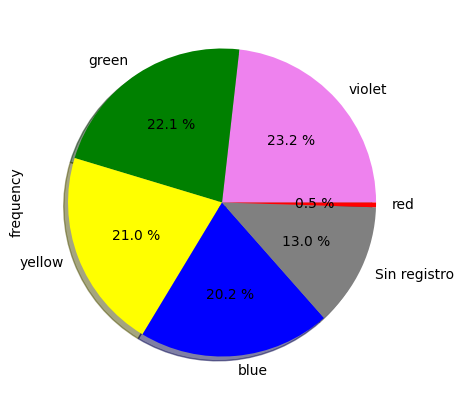

In [7]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Dataframe['color presionado'])

#Elimino las columnas "percentage" y "cumulative_perc" para trabajar con las frecuencias
table2= table1.drop(['percentage','cumulative_perc'], axis=1)

#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table2[table2['frequency']>1]

#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('color presionado')
print(Filtro_index)

# Colores correspondientes a cada categoría
colores = {
    'violet': 'violet',
    'green': 'green',
    'yellow': 'yellow',
    'blue': 'blue',
    'Sin registro': 'gray',  
    'red': 'red'
}

# Lista colores por orden 
colores_plot = [colores[color] for color in Filtro_index.index]

#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%", colors=colores_plot)

 El color "violet" es el más frecuentemente presionado, seguido de cerca por "green".

                    frequency
Usuario                      
LEONARDO                  546
ALEIDA                    487
nicolas                   440
JOSE JAVIER               394
LEONARDO                  371
JESUS ALEJANDRO           356
ramiro isai               332
ADRIAN                    280
SERGIO ANGEL              243
DENISSE                   228
CARLOS ENRIQUE            228
YAEL DAVID                224
VALENTIN                  163
erick                     158
IKER BENJAMIN             152
NICOLAS |                 128
ERICK OSVALDO             126
CONCEPCION                103
KYTZIA                     98
AUSTIN                     96
JOSE IGNACIO TADEO         94
JOSE IAN                   86
ASHLEY                     75
JOSHUA                     74
YEREMI YAZMIN              71
MA DEL ROSARIO             64
BENJAMIN                   51
INGRID                     49
RENE                       44
CARLOS ABEL                39
ARLETT                     29
ESMERALDA 

<Axes: xlabel='Usuario'>

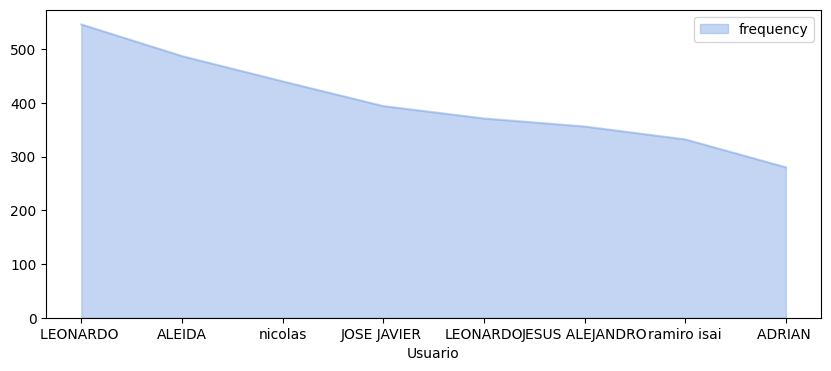

In [8]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Dataframe['Usuario'])

#Elimino las columnas "percentage" y "cumulative_perc" para trabajar con las frecuencias
table2= table1.drop(['percentage','cumulative_perc'], axis=1)

#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table2[table2['frequency']>1]
Filtro2= table2[table2['frequency']>250]

#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('Usuario')
Filtro2_index= Filtro2.set_index('Usuario')
print(Filtro_index)

#Realizamos grafico de área del dataframe filtrado
Filtro2_index.plot(kind='area', figsize=(10,4),alpha = 0.5, color= "#89ade8")

"LEONARDO" es el usuario con más interacciones registradas en el dataset.

                frequency
Administrador            
ALEIDA               3260
nicolas               440
LEONARDO              371
DENISSE               302
SERGIO ANGEL          243
CARLOS ENRIQUE        228
YAEL DAVID            224
AUSTIN                199
VALENTIN              163
erick                 158
IKER BENJAMIN         128
KYTZIA                 98
BENJAMIN               51


<Axes: xlabel='Administrador'>

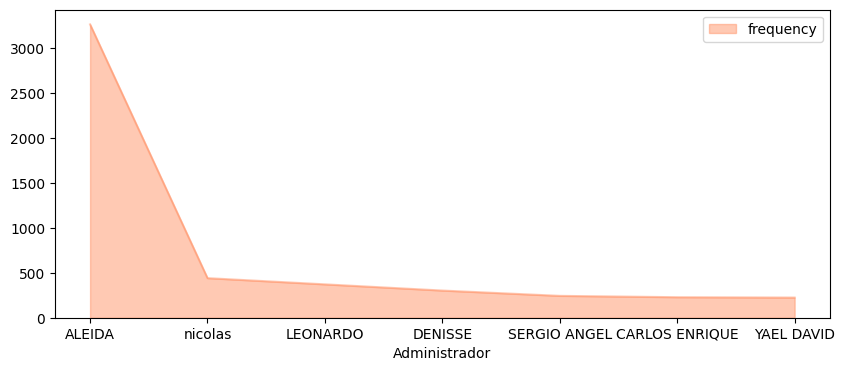

In [9]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Dataframe['Administrador'])

#Elimino las columnas "percentage" y "cumulative_perc" para trabajar con las frecuencias
table2= table1.drop(['percentage','cumulative_perc'], axis=1)

#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table2[table2['frequency']>1]
Filtro2= table2[table2['frequency']>200]

#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('Administrador')
Filtro2_index= Filtro2.set_index('Administrador')
print(Filtro_index)

#Realizamos grafico de área del dataframe filtrado
Filtro2_index.plot(kind='area', figsize=(10,4),alpha = 0.5, color= "#ff9469")

El administrador con mas registros es ALEIDA

## Categorización de variables

In [10]:
#Tiempo de interacción
Dataframe['tiempo de interacción'].info()
n=5865

<class 'pandas.core.series.Series'>
RangeIndex: 5865 entries, 0 to 5864
Series name: tiempo de interacción
Non-Null Count  Dtype  
--------------  -----  
5103 non-null   float64
dtypes: float64(1)
memory usage: 45.9 KB


In [11]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Dataframe['tiempo de interacción'].max()
Min=Dataframe['tiempo de interacción'].min()
Limites= [Min, Max]
print(Limites)

#Calculamos el rango R
R=Max-Min
R

#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(n)
print(ni)

#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

[0.0, 165.1935]
13.51064981461914


12.226910049970588

In [12]:
#Categorización de variables
#Declaramos 2 intervalos (menores de 100) y (mayores de 100)
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
intervalos=np.linspace(-0.99, 165.1936, 14)
print(intervalos)

#Creamos las categorías 
categorias= ["Categoría1", "Categoría2","Categoría3", "Categoría4",
             "Categoría5", "Categoría6","Categoría7", "Categoría8",
             "Categoría9", "Categoría10","Categoría11","Categoría12",
             "Categoría13"]

#Finalmente creamos las categorías en la columna numérica
Dataframe['tiempo de interacción']=pd.cut(x= Dataframe['tiempo de interacción'], bins=intervalos, labels= categorias )


[ -0.99        11.79335385  24.57670769  37.36006154  50.14341538
  62.92676923  75.71012308  88.49347692 101.27683077 114.06018462
 126.84353846 139.62689231 152.41024615 165.1936    ]


Text(0, 0.5, 'Frecuencia')

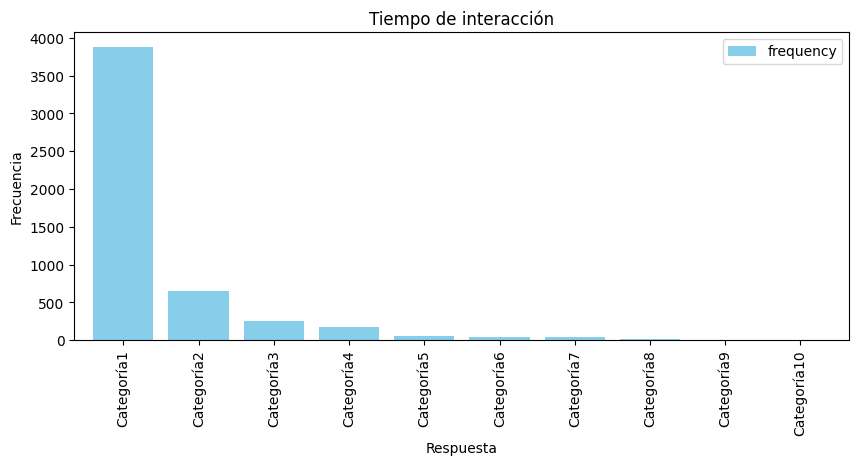

In [13]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Dataframe['tiempo de interacción'])
table1= table1.drop(['percentage','cumulative_perc'], axis=1)

#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro1= table1[table1['frequency']>1]

#Ajusto el indice de mi dataframe
Filtro1_index= Filtro1.set_index('tiempo de interacción')


#Realizamos grafico de barras del dataframe filtrado
Filtro1_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "skyblue")
plt.title('Tiempo de interacción')
plt.xlabel('Respuesta')
plt.ylabel('Frecuencia')

In [14]:
#tiempo de lección
Dataframe['tiempo de lección'].info()
n=5865

<class 'pandas.core.series.Series'>
RangeIndex: 5865 entries, 0 to 5864
Series name: tiempo de lección
Non-Null Count  Dtype  
--------------  -----  
5688 non-null   float64
dtypes: float64(1)
memory usage: 45.9 KB


In [15]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Dataframe['tiempo de lección'].max()
Min=Dataframe['tiempo de lección'].min()
Limites= [Min, Max]
print(Limites)

#Calculamos el rango R
R=Max-Min
R

#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(n)
print(ni)

#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

[0.0, 781.3312]
13.51064981461914


57.830763932210274

In [16]:
#Categorización de variables
#Declaramos 2 intervalos (menores de 100) y (mayores de 100)
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
intervalos=np.linspace(-0.99, 781.3313, 14)
print(intervalos)

#Creamos las categorías 
categorias= ["Categoría1", "Categoría2","Categoría3", "Categoría4",
             "Categoría5", "Categoría6","Categoría7", "Categoría8",
             "Categoría9", "Categoría10","Categoría11","Categoría12",
             "Categoría13"]

#Finalmente creamos las categorías en la columna numérica
Dataframe['tiempo de lección']=pd.cut(x= Dataframe['tiempo de lección'], bins=intervalos, labels= categorias )


[ -0.99        59.18856154 119.36712308 179.54568462 239.72424615
 299.90280769 360.08136923 420.25993077 480.43849231 540.61705385
 600.79561538 660.97417692 721.15273846 781.3313    ]


<Axes: ylabel='frequency'>

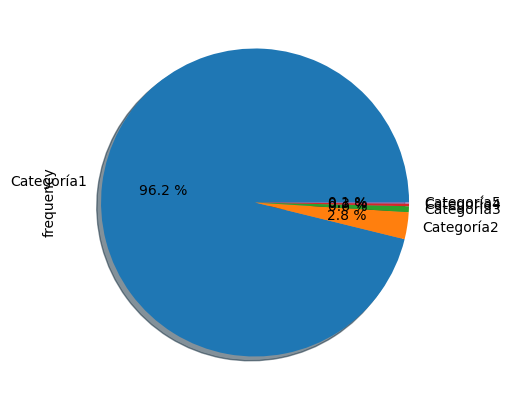

In [17]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Dataframe['tiempo de lección'])
table1= table1.drop(['percentage','cumulative_perc'], axis=1)

#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro1= table1[table1['frequency']>1]

#Ajusto el indice de mi dataframe
Filtro1_index= Filtro1.set_index('tiempo de lección')

#Realizamos grafico de pastel del dataframe filtrado
Filtro1_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

Text(0, 0.5, 'Frecuencia')

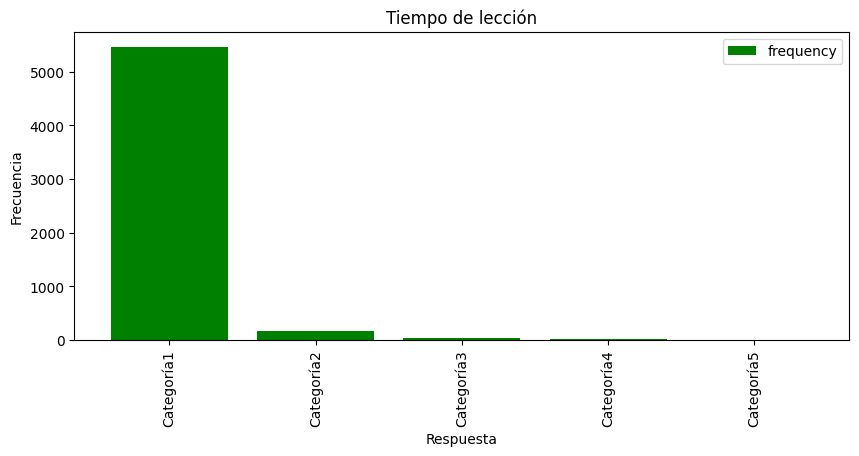

In [18]:
Filtro1_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "green")
plt.title('Tiempo de lección')
plt.xlabel('Respuesta')
plt.ylabel('Frecuencia')

In [19]:
#tiempo de sesión
Dataframe['tiempo de sesión'].info()
n=5865

<class 'pandas.core.series.Series'>
RangeIndex: 5865 entries, 0 to 5864
Series name: tiempo de sesión
Non-Null Count  Dtype  
--------------  -----  
5259 non-null   float64
dtypes: float64(1)
memory usage: 45.9 KB


In [20]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Dataframe['tiempo de sesión'].max()
Min=Dataframe['tiempo de sesión'].min()
Limites= [Min, Max]
print(Limites)

#Calculamos el rango R
R=Max-Min
R

#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(n)
print(ni)

#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

[0.0, 2144.452]
13.51064981461914


158.72308359880702

In [21]:
#Categorización de variables
#Declaramos 2 intervalos (menores de 100) y (mayores de 100)
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
intervalos=np.linspace(-0.99, 2144.453, 14)
print(intervalos)

#Creamos las categorías 
categorias= ["Categoría1", "Categoría2","Categoría3", "Categoría4",
             "Categoría5", "Categoría6","Categoría7", "Categoría8",
             "Categoría9", "Categoría10","Categoría11","Categoría12",
             "Categoría13"]

#Finalmente creamos las categorías en la columna numérica
Dataframe['tiempo de sesión']=pd.cut(x= Dataframe['tiempo de sesión'], bins=intervalos, labels= categorias )

[-9.90000000e-01  1.64044077e+02  3.29078154e+02  4.94112231e+02
  6.59146308e+02  8.24180385e+02  9.89214462e+02  1.15424854e+03
  1.31928262e+03  1.48431669e+03  1.64935077e+03  1.81438485e+03
  1.97941892e+03  2.14445300e+03]


Text(0, 0.5, 'Frecuencia')

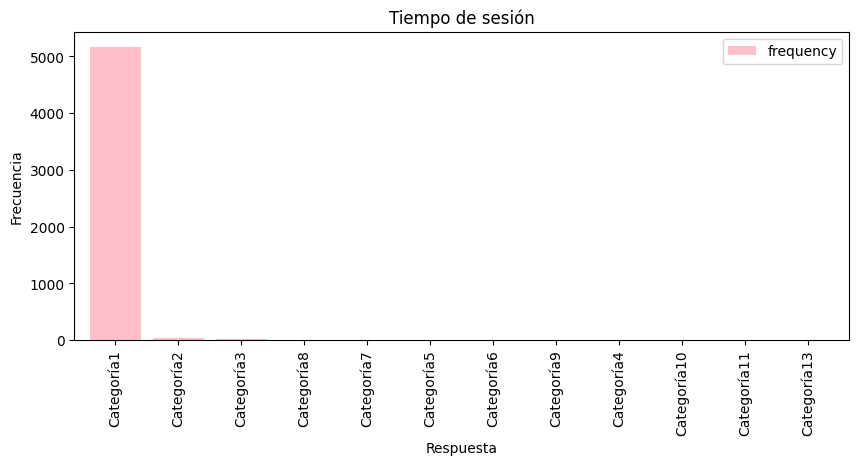

In [22]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Dataframe['tiempo de sesión'])
table1= table1.drop(['percentage','cumulative_perc'], axis=1)

#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro1= table1[table1['frequency']>1]

#Ajusto el indice de mi dataframe
Filtro1_index= Filtro1.set_index('tiempo de sesión')


#Realizamos grafico de barras del dataframe filtrado
Filtro1_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "pink")
plt.title('Tiempo de sesión')
plt.xlabel('Respuesta')
plt.ylabel('Frecuencia')